<a href="https://colab.research.google.com/github/DanielSzarek/175IC-machine-learning/blob/main/zad%209.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import plotly.express as px
import plotly.graph_objects as go
from sklearn.ensemble import IsolationForest

sns.set(font_scale=1.2)
np.random.seed(26)

data = make_blobs(n_samples=300, centers=2, cluster_std=2.0, random_state=10)[0]
data[:5]

tmp = pd.DataFrame(data=data, columns={'x1', 'x2'})
px.scatter(tmp, x='x1', y='x2', template='plotly_dark')

Estimators: 10, Contamination: 0.15000000000000002


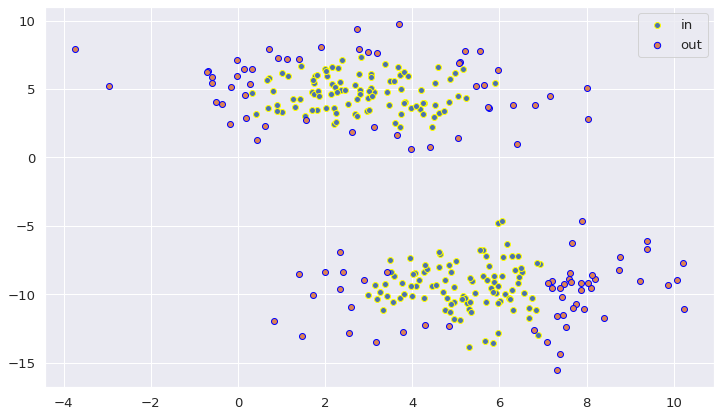

Estimators: 20, Contamination: 0.25


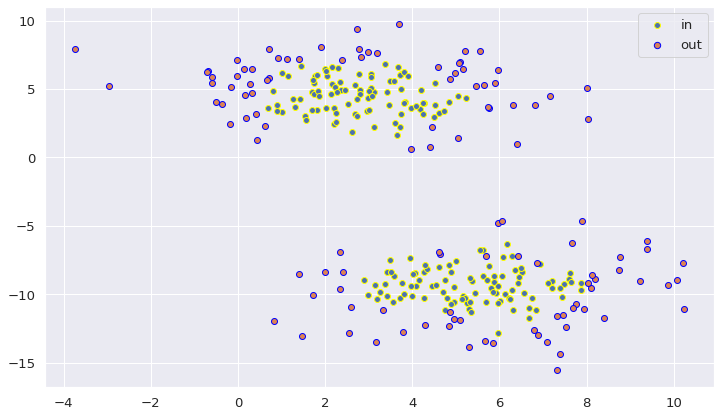

Estimators: 30, Contamination: 0.35


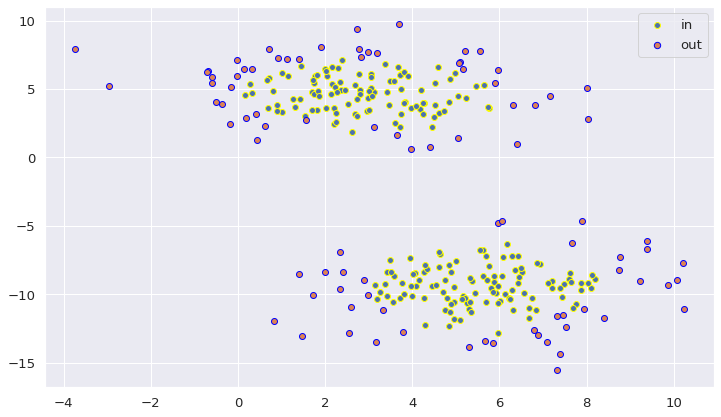

Estimators: 40, Contamination: 0.44999999999999996


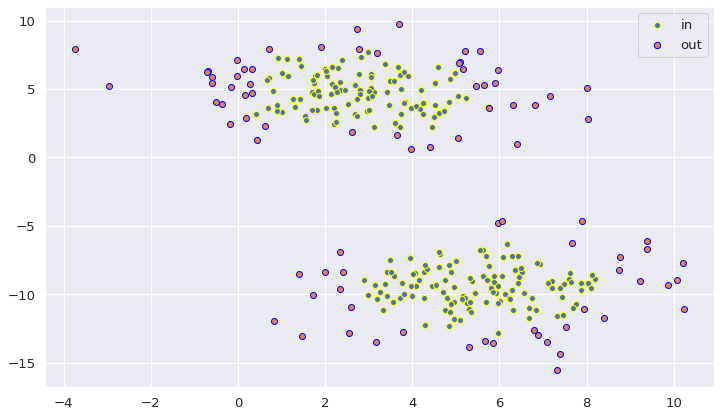

Estimators: 50, Contamination: 0.5499999999999999


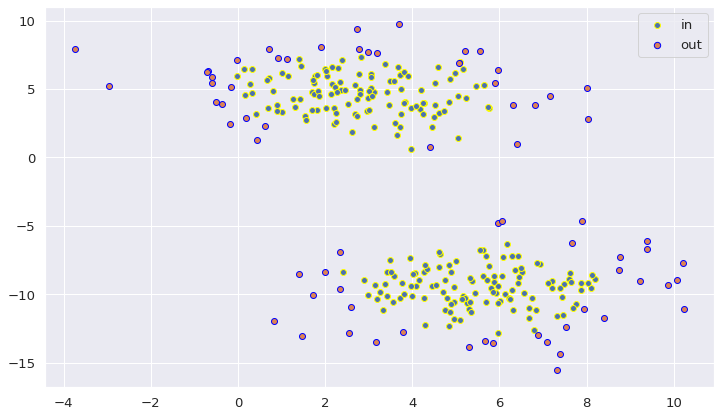

In [44]:
def iso_forest_plot(data, n_estimators=100, contamination=0.05):
  outlier = IsolationForest(n_estimators, contamination)
  y_pred = outlier.fit_predict(data)

  all_data = np.c_[data, y_pred]

  # Inside = 1; Outside = -1
  point_in = [i[:2] for i in all_data if i[2] == 1]
  point_out = [i[:2] for i in all_data if i[2] == -1]

  plt.figure(figsize=(12, 7))
  plt.scatter(x=np.array(point_in)[:, 0], y=np.array(point_in)[:, 1], edgecolors='yellow', label='in')
  plt.scatter(x=np.array(point_out)[:, 0], y=np.array(point_out)[:, 1], edgecolors='blue', label='out')

  legend = plt.legend()
  legend.legendHandles[1]._sizes = [40]
  plt.show()

contamination = 0.05
for n in range(10, 60, 10):
  global contamination
  contamination += 0.1
  print(f"Estimators: {n}, Contamination: {contamination}")
  iso_forest_plot(data, n, contamination)